LDA topic model for content in each category

source: https://developer.ibm.com/tutorials/awb-lda-topic-modeling-text-analysis-python/

In [1]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models as gensimvisualize
from collections import defaultdict, Counter

In [2]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [word for word in tokens if len(word) > 2]
    return tokens

LDA model for all documents

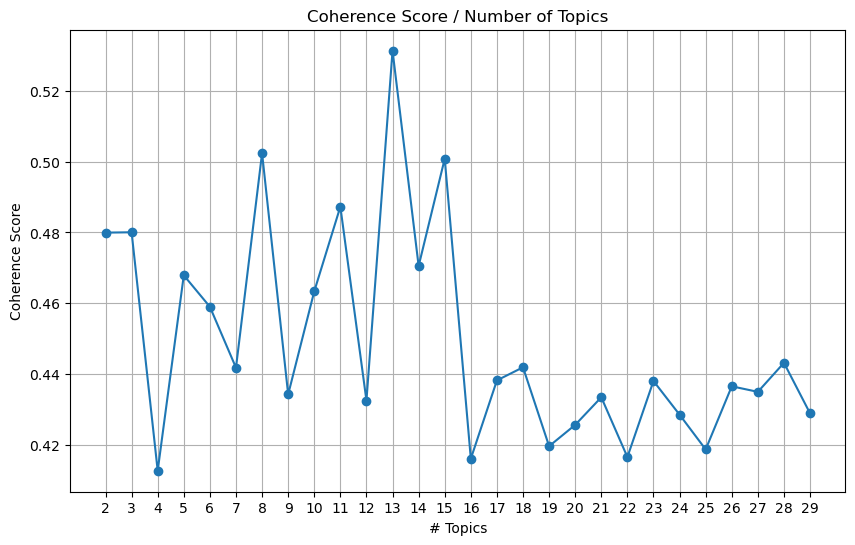

In [12]:
# Find best num of topics for highest coherence score
data = pd.read_csv('dataset/category_with_document.csv')

# Preprocess documents
data['processed_Document'] = data['Document'].apply(preprocess_text)
texts = data['processed_Document'].tolist()

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=2)
corpus = [dictionary.doc2bow(text) for text in texts]

num_topics_list = range(2, 30)
coherence_scores = []

for num_topics in num_topics_list:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, random_state=4583,
                         chunksize=20, num_topics=num_topics, passes=50, iterations=100)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores
plt.figure(figsize=(10, 6))
plt.plot(num_topics_list, coherence_scores, marker='o')
plt.title('Coherence Score / Number of Topics')
plt.xlabel('# Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics_list)
plt.grid()
plt.show()


In [184]:
# LDA modeling for all documents
data = pd.read_csv('dataset/category_with_document.csv')

data['processed_Document'] = data['Document'].apply(preprocess_text)
texts = data['processed_Document'].tolist()

# load dictionary
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below = 2, no_above=0.7)

# generate corpus as BoW
corpus = [dictionary.doc2bow(text) for text in texts]

# train LDA model
num_topics=11
lda_model = LdaModel(corpus=corpus, id2word=dictionary, chunksize=20, num_topics=num_topics, passes=100, iterations=200, random_state=28, eta=0.1)

for topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(topic)

coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score:', coherence_score)

(0, '0.026*"data" + 0.022*"spark" + 0.018*"using" + 0.016*"pytorch" + 0.016*"untrusted" + 0.015*"access" + 0.014*"distributed" + 0.014*"configuration" + 0.012*"run" + 0.012*"secret"')
(1, '0.104*"vulnerability" + 0.089*"issue" + 0.078*"report" + 0.059*"please" + 0.047*"reporting" + 0.024*"email" + 0.022*"bug" + 0.017*"disclosure" + 0.015*"public" + 0.014*"team"')
(2, '0.076*"project" + 0.043*"following" + 0.042*"vulnerability" + 0.040*"software" + 0.037*"process" + 0.036*"get" + 0.029*"discovered" + 0.022*"read" + 0.022*"working" + 0.021*"apache"')
(3, '0.052*"update" + 0.031*"source" + 0.030*"help" + 0.027*"including" + 0.026*"message" + 0.020*"injection" + 0.020*"exploit" + 0.019*"etc" + 0.019*"related" + 0.018*"affected"')
(4, '0.130*"github" + 0.043*"repository" + 0.027*"feature" + 0.025*"communication" + 0.024*"case" + 0.021*"includes" + 0.020*"tool" + 0.019*"merge" + 0.018*"ensure" + 0.017*"two"')
(5, '0.258*"version" + 0.179*"supported" + 0.056*"support" + 0.051*"latest" + 0.019

λ = 0; the terms are ranked purely by their probability within the topic

λ = 1; the terms are ranked purely by their overall term frequency across all topics (most common terms in the dataset)

In [185]:
# visualize
dickens_visual = gensimvisualize.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(dickens_visual)

In [186]:
# Top 10 most relevance terms in each topics
topic_info = dickens_visual.topic_info
topic_terms = topic_info.groupby('Category')

category_term_counts = {topic: Counter() for topic in topic_terms.groups}
category_term_details = {topic: {} for topic in topic_terms.groups}

for topic, group in topic_terms:
    print(f"Topic {topic}:")
    sorted_words = group.sort_values(by='Freq', ascending=False)
    top_words = sorted_words[['Term', 'Freq']].head(10)
    for word, freq in zip(top_words['Term'], top_words['Freq']):
        print(f"  {word} ({freq:.2f})")
    print("\n")

top_terms_per_topic = {}

for topic, group in topic_terms:
    sorted_words = group.sort_values(by='Freq', ascending=False)
    top_terms = sorted_words[['Term', 'Freq']].head(10)  # Select top 10 terms
    top_terms_per_topic[topic] = set(top_terms['Term'])

Topic Default:
  vulnerability (651.00)
  issue (518.00)
  report (456.00)
  please (378.00)
  version (332.00)
  reporting (275.00)
  supported (230.00)
  policy (228.00)
  release (180.00)
  project (154.00)


Topic Topic1:
  vulnerability (603.51)
  issue (517.86)
  report (455.71)
  please (342.92)
  reporting (274.79)
  email (140.37)
  bug (126.60)
  disclosure (97.74)
  public (88.44)
  team (81.68)


Topic Topic10:
  policy (227.97)
  application (28.63)
  thanks (26.60)
  developer (20.45)
  microsoft (18.13)
  thank (17.96)
  helping (10.92)
  block (10.31)
  header (9.28)
  visit (9.12)


Topic Topic11:
  see (52.16)
  submitted (18.73)
  zope (16.57)
  accept (16.35)
  party (15.72)
  third (14.65)
  treated (11.62)
  platform (11.15)
  nospam (8.55)
  share (8.30)


Topic Topic2:
  code (89.88)
  use (81.15)
  advisory (80.02)
  whitecheckmark (79.15)
  file (75.05)
  found (64.96)
  key (64.11)
  information (63.12)
  detail (62.07)
  include (52.30)


Topic Topic3:
  dat

In [187]:
# Count terms occurance in each category
data = pd.read_csv('sampled_4_category_with_document.csv')
data['processed_Document'] = data['Document'].apply(preprocess_text)

topic_terms = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
top_terms_per_topic = {topic: [term for term, _ in words] for topic, words in topic_terms}

# count term occurrences in each category
category_term_counts = defaultdict(Counter)
category_term_details = defaultdict(lambda: defaultdict(Counter))

# Identify terms that appear in multiple topics
term_topic_mapping = defaultdict(set)
for topic, terms in top_terms_per_topic.items():
    for term in terms:
        term_topic_mapping[term].add(topic)
multi_topic_terms = {term: topics for term, topics in term_topic_mapping.items() if len(topics) > 1}

print("Multi-topic terms:")
for term, topics in multi_topic_terms.items():
    print(f"{term}: Topics {sorted(topics)}")

multi_topic_term_category_counts = defaultdict(lambda: defaultdict(int))

# Count occurrences of multi-topic terms per category
for term, topics in multi_topic_terms.items():
    for _, row in data.iterrows():
        category = row['Category']
        document_content = str(row['processed_Document']).lower()
        count = document_content.count(term)

        if count > 0:
            multi_topic_term_category_counts[term][category] += count

# Count occurrences only for non-multi-topic terms
for topic, top_terms in top_terms_per_topic.items():
    single_topic = [term for term in top_terms if term not in multi_topic_terms]
    for _, row in data.iterrows():
        category = row['Category']
        document_content = str(row['processed_Document']).lower()

        term_counts = {term: document_content.count(term) for term in single_topic}
        total_count = sum(term_counts.values())

        category_term_counts[topic][category] += total_count

        if category not in category_term_details[topic]:
            category_term_details[topic][category] = Counter()
        category_term_details[topic][category].update(term_counts)


multi_topic_term_df = pd.DataFrame(multi_topic_term_category_counts).T.fillna(0)
multi_topic_term_df['Topics'] = multi_topic_term_df.index.map(lambda term: sorted(multi_topic_terms[term]))

# most occurrences for each topic
topic_category_analysis = {
    topic: {
        "Category": category_counts.most_common(1)[0][0] if category_counts else "None",
        "Occurrences": category_counts.most_common(1)[0][1] if category_counts else 0,
        "Terms": category_term_details[topic][category_counts.most_common(1)[0][0]] if category_counts else {}
    }
    for topic, category_counts in category_term_counts.items()
}

print(multi_topic_terms)
display(multi_topic_term_df)
display(topic_category_analysis)

Multi-topic terms:
vulnerability: Topics [1, 2]
use: Topics [6, 8]
{'vulnerability': {1, 2}, 'use': {8, 6}}


,Generic policy,Reporting mechanism,Scope of practise,User guideline,Topics
vulnerability,36,220,13,33,"[1, 2]"
use,6,36,11,147,"[6, 8]"


{0: {'Category': 'User guideline',
  'Occurrences': 534,
  'Terms': Counter({'data': 45,
           'spark': 163,
           'using': 59,
           'pytorch': 24,
           'untrusted': 49,
           'access': 47,
           'distributed': 17,
           'configuration': 34,
           'run': 67,
           'secret': 29})},
 1: {'Category': 'Reporting mechanism',
  'Occurrences': 828,
  'Terms': Counter({'issue': 170,
           'report': 267,
           'please': 103,
           'reporting': 115,
           'email': 50,
           'bug': 34,
           'disclosure': 28,
           'public': 42,
           'team': 19})},
 2: {'Category': 'Reporting mechanism',
  'Occurrences': 134,
  'Terms': Counter({'project': 39,
           'following': 16,
           'software': 13,
           'process': 11,
           'get': 14,
           'discovered': 7,
           'read': 6,
           'working': 5,
           'apache': 23})},
 3: {'Category': 'User guideline',
  'Occurrences': 111,
  'Terms

In [188]:
# number of term's occurance in each category content to csv
csv_data = []

# Iterate through each topic and its term count per category
for topic, category_counts in category_term_details.items():
    for category, term_counts in category_counts.items():
        for term, count in term_counts.items():
            csv_data.append({
                "Topic": topic,
                "Category": category,
                "Term": term,
                "Occurrences": count
            })


csv_df = pd.DataFrame(csv_data)
csv_filename = "topic_term_occurrences_in_cat.csv"
csv_df.to_csv(csv_filename, index=False)

In [44]:
# sampling content for each cat / 100 each
file_path = "dataset/category_with_document.csv"
df = pd.read_csv(file_path)
target_categories = ['Generic policy', 'Reporting mechanism', 'User guideline', 'Scope of practise']

# Filter rows that belong to the target categories
filtered_df = df[df['Category'].isin(target_categories)]
# Randomly sample 100 rows from each category
sampled_df = filtered_df.groupby('Category').sample(n=100, random_state=42, replace=True)

sampled_df.to_csv("sampled_4_category_with_document.csv", index=False)
